# Feature Engineering & Machine Learning with Snowpark
### Objectif : 
Trouver parmis une liste d'annonces immobiliéres les biens en ventes les plus rentables pour un investissement locatif
### Données en entrée : 
Tables Snowflake contenant des annonces immobiliéres de ventes et de location  
### Etapes permettant d'atteindre l'objectif : 
![title](img/UC.png)




# C'est parti !!!!

#### Connexion à Snowflake 

In [1]:
import json

import numpy as np
import pandas as pd
import snowflake.snowpark.functions as F
import snowflake.snowpark.types as T
from snowflake.snowpark import Session
from snowflake.snowpark.types import PandasDataFrame, PandasSeries

with open("Creds.json") as f:
    connection_parameters = json.load(f)

mySnowSess = Session.builder.configs(connection_parameters).create()

# Préparation des données
![title](img/UC_1.png)

In [2]:
SnowDataFrame_AnnLoc_Brut = mySnowSess.table("ANNONCES_IMMOBILIERES").filter(
    F.col("ADS_CATEGORY_NAME") == "Locations"
)

In [9]:
SnowDataFrame_AnnLoc_Brut.select(F.object_construct(F.col('*'))).show()






------------------------------------------------------
|"OBJECT_CONSTRUCT(*)"                               |
------------------------------------------------------
|{                                                   |
|  "ADS_ATTR_ENERGY_RATE": "C",                      |
|  "ADS_ATTR_FURNISHED": "Non meublé",               |
|  "ADS_ATTR_GES": "E",                              |
|  "ADS_ATTR_REAL_ESTATE_TYPE": "Appartement",       |
|  "ADS_ATTR_ROOMS": 3,                              |
|  "ADS_ATTR_SQUARE": 64,                            |
|  "ADS_CATEGORY_NAME": "Locations",                 |
|  "ADS_FIRST_PUBLICATION_DATE": "2022-10-03",       |
|  "ADS_GEO_ARRONDISSEMENT": "Bourg-en-Bresse",      |
|  "ADS_GEO_ARRONDISSEMENT_LAT": 4.6209915161000...  |
|  "ADS_GEO_ARRONDISSEMENT_LNG": 5.0924952310000...  |
|  "ADS_GEO_CITY": "Bourg-en-Bresse (01)",           |
|  "ADS_GEO_CITY_LAT": 4.620451164200000e+01,        |
|  "ADS_GEO_CITY_LNG": 5.248452422000000e+00,        |
|  "ADS_GE

In [3]:
SnowDataFrame_AnnLoc_Brut.limit(10).to_pandas()

,ADS_ID,ADS_CATEGORY_NAME,ADS_FIRST_PUBLICATION_DATE,ADS_SUBJECT,ADS_PRICE,ADS_OPT_URGENT,ADS_OWNER_TYPE,ADS_ATTR_REAL_ESTATE_TYPE,ADS_ATTR_ROOMS,ADS_ATTR_SQUARE,...,ADS_GEO_LNG,ADS_GEO_CITY_LAT,ADS_GEO_CITY_LNG,ADS_GEO_CITY,ADS_GEO_ZIPCODE,ADS_GEO_REGION,ADS_GEO_DEPARTEMENT,ADS_GEO_ARRONDISSEMENT,ADS_GEO_ARRONDISSEMENT_LAT,ADS_GEO_ARRONDISSEMENT_LNG
0,2231477249,Locations,2022-10-03,T3- Croix Blanche - 64 m²,457,False,pro,Appartement,3,64,...,5.22758,46.204512,5.248452,Bourg-en-Bresse (01),01000,Auvergne-Rhône-Alpes,Ain (01),Bourg-en-Bresse,46.209915,5.092495
1,2231978322,Locations,2022-10-04,Appartement 3 pièces 66 m²,505,False,pro,Appartement,3,66,...,5.22758,46.204512,5.248452,Bourg-en-Bresse (01),01000,Auvergne-Rhône-Alpes,Ain (01),Bourg-en-Bresse,46.209915,5.092495
2,2231978329,Locations,2022-10-04,Appartement 3 pièces 67 m²,688,False,pro,Appartement,3,67,...,5.22758,46.204512,5.248452,Bourg-en-Bresse (01),01000,Auvergne-Rhône-Alpes,Ain (01),Bourg-en-Bresse,46.209915,5.092495
3,2231978327,Locations,2022-10-04,Appartement 1 pièce 30 m²,330,False,pro,Appartement,1,30,...,5.22758,46.204512,5.248452,Bourg-en-Bresse (01),01000,Auvergne-Rhône-Alpes,Ain (01),Bourg-en-Bresse,46.209915,5.092495
4,2231814469,Locations,2022-10-04,Appartement 3 pièces 67 m²,498,False,pro,Appartement,3,67,...,5.22758,46.204512,5.248452,Bourg-en-Bresse (01),01000,Auvergne-Rhône-Alpes,Ain (01),Bourg-en-Bresse,46.209915,5.092495
5,2231850797,Locations,2022-10-04,Pavillon 4 pièces 73 m²,747,False,pro,Maison,4,73,...,5.19014,46.208864,5.187594,Saint-Denis-lès-Bourg (01),01000,Auvergne-Rhône-Alpes,Ain (01),Bourg-en-Bresse,46.209915,5.092495
6,2231848890,Locations,2022-10-04,Maison 5 pièces 115 m²,1250,False,pro,Maison,5,115,...,5.22758,46.204512,5.248452,Bourg-en-Bresse (01),01000,Auvergne-Rhône-Alpes,Ain (01),Bourg-en-Bresse,46.209915,5.092495
7,2227796316,Locations,2022-09-26,Appartement 1 pièce 32 m²,361,False,pro,Appartement,1,32,...,5.22758,46.204512,5.248452,Bourg-en-Bresse (01),01000,Auvergne-Rhône-Alpes,Ain (01),Bourg-en-Bresse,46.209915,5.092495
8,2231888255,Locations,2022-10-04,Appartement 2 pièces 50 m²,691,False,pro,Appartement,2,50,...,5.22758,46.204512,5.248452,Bourg-en-Bresse (01),01000,Auvergne-Rhône-Alpes,Ain (01),Bourg-en-Bresse,46.209915,5.092495
9,2231978321,Locations,2022-10-04,Appartement 1 pièce 25 m²,359,False,pro,Appartement,1,25,...,5.22758,46.204512,5.248452,Bourg-en-Bresse (01),01000,Auvergne-Rhône-Alpes,Ain (01),Bourg-en-Bresse,46.209915,5.092495


![title](img/UC_2.png)


### On calcule le prix / m2 median pour chaque ville

In [4]:
SnowDataFrame_PrixM2_Median = (
    SnowDataFrame_AnnLoc_Brut.select(
        F.col("ADS_GEO_ZIPCODE"),
        F.col("ADS_GEO_CITY"),
        (F.col("ADS_PRICE") / F.col("ADS_ATTR_SQUARE")).as_("ADS_PRICE_SQUARE"),
    )
    .groupBy(
        F.col("ADS_GEO_ZIPCODE"),
        F.col("ADS_GEO_CITY"),
    )
    .agg(
        [
            F.median(F.col("ADS_PRICE_SQUARE")).as_("MED_PRICE"),
        ]
    )
)

### On associe le prix median à chaque annonce (Join)

In [5]:
SnowDataFrame_AnnLoc_PrixM2_Median = SnowDataFrame_AnnLoc_Brut.join(
    SnowDataFrame_PrixM2_Median,
    (
        SnowDataFrame_AnnLoc_Brut.col("ADS_GEO_ZIPCODE")
        == SnowDataFrame_PrixM2_Median.col("ADS_GEO_ZIPCODE")
    )
    & (
        SnowDataFrame_AnnLoc_Brut.col("ADS_GEO_CITY")
        == SnowDataFrame_PrixM2_Median.col("ADS_GEO_CITY")
    ),
)

### On filtre les données 

In [6]:
SnowDataFrame_AnnLoc_SansOutlier = (
    SnowDataFrame_AnnLoc_PrixM2_Median.withColumn(
        "ADS_PRICE_SQUARE", F.col("ADS_PRICE") / F.col("ADS_ATTR_SQUARE")
    )
    .filter(
        (
            F.col("ADS_PRICE_SQUARE") / (F.col("ADS_PRICE_SQUARE") + F.col("MED_PRICE"))
            >= 0.3
        )
        & (
            F.col("ADS_PRICE_SQUARE") / (F.col("ADS_PRICE_SQUARE") + F.col("MED_PRICE"))
            < 0.7
        )
        & (F.col("ADS_PRICE_SQUARE") < 150)
        & (F.col("ADS_PRICE_SQUARE") > 0)
        & (F.col("ADS_ATTR_SQUARE") >= 9)
        & (F.col("ADS_ATTR_SQUARE") <= 300)
    )
    .select(
        F.col("ADS_GEO_LAT"),
        F.col("ADS_GEO_LNG"),
        F.col("ADS_ATTR_ROOMS"),
        F.col("ADS_ATTR_SQUARE"),
        F.col("ADS_ATTR_REAL_ESTATE_TYPE"),
        F.col("ADS_ATTR_ENERGY_RATE"),
        F.col("ADS_PRICE"),
    )
)

In [7]:
SnowDataFrame_AnnLoc_SansOutlier.limit(10).to_pandas()

,ADS_GEO_LAT,ADS_GEO_LNG,ADS_ATTR_ROOMS,ADS_ATTR_SQUARE,ADS_ATTR_REAL_ESTATE_TYPE,ADS_ATTR_ENERGY_RATE,ADS_PRICE
0,46.86295,3.326990,3,59,Appartement,E,445
1,45.68708,5.319970,3,44,Appartement,E,595
2,45.27357,1.632940,4,80,Maison,A,850
3,47.22705,0.580860,2,54,Appartement,D,425
4,44.18311,0.670450,4,75,Appartement,A,500
5,44.18624,0.668360,4,89,Maison,C,880
6,44.18624,0.668360,4,78,Maison,Vierge,700
7,44.18734,0.669371,4,80,Maison,D,790
8,44.18624,0.668360,4,88,Maison,D,800
9,44.18624,0.668360,4,89,Maison,C,880


![title](img/UC_3.png)

### On définit une fonction pour encoder le type de bien 

In [8]:
@F.pandas_udf(
    name="UDF_Encode_TypeDeBien_Snow",
    is_permanent=True,
    stage_location="@REAL_ESTATE_DATA",
    replace=True,
    max_batch_size=5000,
)
def UDF_Encode_TypeDeBien(
    x: PandasSeries[str],
) -> PandasSeries[int]:
    return x.apply(
        lambda val: 2 if val == "Maison" else 1 if val == "Appartement" else 0
    )

### On définit une fonction pour encoder la classe énergie 

In [9]:
from sklearn import preprocessing

ADS_ATTR_ENERGY_RATE_List = np.array(
    mySnowSess.table("ANNONCES_IMMOBILIERES")
    .select(F.col("ADS_ATTR_ENERGY_RATE"))
    .distinct()
    .collect()
).flat

le = preprocessing.LabelEncoder()
le.fit(ADS_ATTR_ENERGY_RATE_List)

dep_packages = ["scikit-learn"]


@F.pandas_udf(
    name="UDF_Encode_ClasseEnergie",
    packages=dep_packages,
    is_permanent=True,
    stage_location="@REAL_ESTATE_DATA",
    replace=True,
    max_batch_size=1000,
)
def UDF_Encode_ClasseEnergie(
    x: PandasSeries[str],
) -> PandasSeries[int]:
    return le.transform(x)

In [10]:
SnowDataFrame_AnnLoc_PourEntrainement = SnowDataFrame_AnnLoc_SansOutlier.select(
    F.col("ADS_GEO_LAT"),
    F.col("ADS_GEO_LNG"),
    F.col("ADS_ATTR_ROOMS"),
    F.col("ADS_ATTR_SQUARE"),
    UDF_Encode_TypeDeBien(F.col("ADS_ATTR_REAL_ESTATE_TYPE")).as_(
        "ADS_ATTR_REAL_ESTATE_TYPE_NUM"
    ),
    UDF_Encode_ClasseEnergie(F.col("ADS_ATTR_ENERGY_RATE")).as_(
        "ADS_ATTR_ENERGY_RATE_NUM"
    ),
    F.col("ADS_PRICE"),
)
SnowDataFrame_AnnLoc_PourEntrainement.limit(10).to_pandas()

,ADS_GEO_LAT,ADS_GEO_LNG,ADS_ATTR_ROOMS,ADS_ATTR_SQUARE,ADS_ATTR_REAL_ESTATE_TYPE_NUM,ADS_ATTR_ENERGY_RATE_NUM,ADS_PRICE
0,50.193250,2.627550,3,42,2,4,563
1,48.044950,6.403990,3,62,1,4,414
2,48.044950,6.403990,3,58,1,3,367
3,48.045740,6.406120,1,48,1,8,380
4,48.044950,6.403990,4,69,1,3,368
5,48.044950,6.403990,1,33,1,3,267
6,48.044950,6.403990,4,79,1,3,504
7,47.124590,-1.419140,4,86,2,0,1115
8,47.124590,-1.419140,7,157,2,3,1250
9,47.124676,-1.419011,4,160,2,2,1218


![title](img/UC_4.png)

### Création du jeu de données d'entrainement et de test (sklearn)

In [11]:
CollectedDataframe = SnowDataFrame_AnnLoc_PourEntrainement.to_pandas()

target = "ADS_PRICE"
predictors = [
    "ADS_GEO_LAT",
    "ADS_GEO_LNG",
    "ADS_ATTR_ROOMS",
    "ADS_ATTR_SQUARE",
    "ADS_ATTR_REAL_ESTATE_TYPE_NUM",
    "ADS_ATTR_ENERGY_RATE_NUM",
]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    CollectedDataframe[predictors], CollectedDataframe[target], test_size=0.2
)

import xgboost as xgb

DMatrix_train = xgb.DMatrix(X_train, label=y_train)
DMatrix_test = xgb.DMatrix(X_test, label=y_test)

### On entraine le modèle en utilisant XGBoost

In [12]:
param = {}
param["booster"] = "gbtree"
param["objective"] = "reg:squarederror"
param["max_depth"] = 10
param["eta"] = 0.5
param["max_delta_step"] = 0
param["alpha"] = 0
param["lambda"] = 1
param["gamma"] = 0
param["min_child_weight"] = 2.75
param["subsample"] = 0.75
param["colsample_bytree"] = 1
param["colsample_bylevel"] = 1
param["scale_pos_weight"] = 1
param["nthread"] = -1
param["verbosity"] = 1

evallist = [(DMatrix_train, "train"), (DMatrix_test, "eval")]
num_round = 30
bst = xgb.train(param, DMatrix_train, num_round, evallist, early_stopping_rounds=4)

[0]	train-rmse:431.93683	eval-rmse:432.19238
[1]	train-rmse:253.20288	eval-rmse:255.78543
[2]	train-rmse:175.49087	eval-rmse:181.58440
[3]	train-rmse:144.96614	eval-rmse:154.45738
[4]	train-rmse:133.33391	eval-rmse:144.98389
[5]	train-rmse:128.42012	eval-rmse:141.59900
[6]	train-rmse:125.07488	eval-rmse:139.51708
[7]	train-rmse:121.99467	eval-rmse:138.13013
[8]	train-rmse:119.93991	eval-rmse:137.40678
[9]	train-rmse:118.56762	eval-rmse:136.99484
[10]	train-rmse:117.47521	eval-rmse:136.71646
[11]	train-rmse:117.16900	eval-rmse:136.64108
[12]	train-rmse:116.07769	eval-rmse:136.25450
[13]	train-rmse:115.54581	eval-rmse:136.19904
[14]	train-rmse:114.46070	eval-rmse:135.81654
[15]	train-rmse:113.16626	eval-rmse:135.68443
[16]	train-rmse:112.30393	eval-rmse:135.33592
[17]	train-rmse:111.58433	eval-rmse:135.09049
[18]	train-rmse:111.15814	eval-rmse:135.01834
[19]	train-rmse:110.46849	eval-rmse:135.14493
[20]	train-rmse:110.35816	eval-rmse:135.15486
[21]	train-rmse:109.00359	eval-rmse:134.2939

### On teste la qualité du modèle

pred_test :  0.8465124368667603


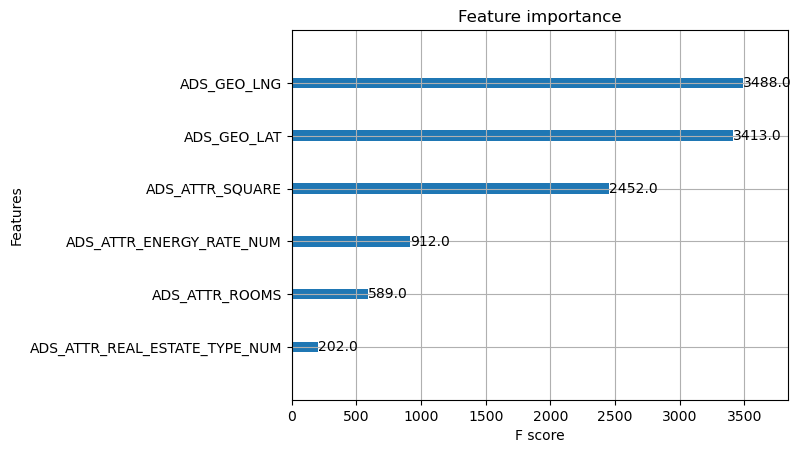

In [13]:
import matplotlib

xgb.plot_importance(bst)
from sklearn.metrics import explained_variance_score

pred_test = bst.predict(DMatrix_test)
print("pred_test : ", explained_variance_score(pred_test, DMatrix_test.get_label()))

![title](img/UC_5.png)

In [14]:
import cachetools


@cachetools.cached(cache={})
def load_xgboost_model(import_dir: str) -> object:
    import pandas
    import xgboost as xgb

    file_path = import_dir
    bst = xgb.Booster({"nthread": 0})  # init model
    bst.load_model(file_path)
    return xgb, bst

In [15]:
bst.save_model("./xgboost-model/RentPriceEstimation.xbmodel")
mySnowSess.sql(
    "put 'file:///Users/apicard/Documents/SnowFlake/Project/SnowParkPython/Project_1/Streamlit-realestate-LBC/xgboost-model/RentPriceEstimation.xbmodel' @REAL_ESTATE_DATA overwrite=true AUTO_COMPRESS = FALSE"
).collect()

dep_packages = [
    "pandas==1.3.5",
    "xgboost==1.5.0",
    "cachetools==4.2.2",
    "cloudpickle==2.0.0",
]
dep_imports = ["@REAL_ESTATE_DATA/RentPriceEstimation.xbmodel"]


@F.pandas_udf(
    name="get_PrixLocation_XGBoost",
    is_permanent=True,
    stage_location="@REAL_ESTATE_DATA",
    replace=True,
    max_batch_size=5000,
    imports=dep_imports,
    packages=dep_packages,
)
def get_PrixLocation_XGBoost(
    df: T.PandasDataFrame[float, float, float, float, float, float]
) -> T.PandasSeries[int]:
    import os
    import sys
    from pathlib import Path

    import pandas as pd

    IMPORT_DIRECTORY_NAME = "snowflake_import_directory"
    import_dir = sys._xoptions[IMPORT_DIRECTORY_NAME]
    xgb, model = load_xgboost_model(import_dir + "RentPriceEstimation.xbmodel")
    rowDMatrix = xgb.DMatrix(df, enable_categorical=True)
    return model.predict(rowDMatrix)

![title](img/UC_6.png)
### On récupére les 10 appartements les plus rentables dans le 1er arrondissement

In [16]:
pd.DataFrame(
    (
        mySnowSess.table("ANNONCES_IMMOBILIERES")
        .filter(
            (F.col("ADS_GEO_ZIPCODE") == "75001")
            & (F.col("ADS_ATTR_REAL_ESTATE_TYPE") == "Appartement")
            & (F.col("ADS_CATEGORY_NAME") == "Ventes immobilières")
        )
        .withColumn(
            "ESTIMATEDRENTPRICE",
            get_PrixLocation_XGBoost(
                F.col("ADS_GEO_LAT"),
                F.col("ADS_GEO_LNG"),
                F.col("ADS_ATTR_ROOMS"),
                F.col("ADS_ATTR_SQUARE"),
                UDF_Encode_TypeDeBien(F.col("ADS_ATTR_REAL_ESTATE_TYPE")),
                UDF_Encode_ClasseEnergie(F.col("ADS_ATTR_ENERGY_RATE")),
            ),
        )
        .select(
            F.col("ADS_SUBJECT"),
            F.col("ADS_ATTR_ROOMS"),
            F.col("ADS_ATTR_SQUARE"),
            F.col("ADS_PRICE"),
            F.col("ESTIMATEDRENTPRICE"),
        )
    )
    .withColumn(
        "RENTABILITY",
        100 * (F.col("ESTIMATEDRENTPRICE") * 12) / F.col("ADS_PRICE"),
    )
    .sort(F.col("RENTABILITY"), ascending=False)
    .limit(10)
    .collect()
)

,ADS_SUBJECT,ADS_ATTR_ROOMS,ADS_ATTR_SQUARE,ADS_PRICE,ESTIMATEDRENTPRICE,RENTABILITY
0,Appartement 3 pièces 60 m²,3,60,175000,2160,14.811429
1,Studio 1 pièce 23 m²,1,23,82500,985,14.327273
2,Appartement 4 pièces 139 m²,4,139,421000,4361,12.430404
3,Appartement 5 pièces 90 m²,5,90,336000,3076,10.985714
4,Appartement 5 pièces 90 m²,5,90,336000,3076,10.985714
5,Appt T4 - Frais de notaire offerts - Spécial i...,4,68,262900,2304,10.516546
6,Duplex 4 pièces 86 m²,4,86,297825,2559,10.310753
7,Studio 1 pièce 22 m²,1,22,99900,834,10.018018
8,Studio 1 pièce 22 m²,1,22,99900,834,10.018018
9,Studio 1 pièce 22 m²,1,22,99900,834,10.018018


### On applique la fonction de calcul du prix de location à toutes les annonces

In [17]:
mySnowSess.table("ANNONCES_IMMOBILIERES").filter(
    (F.col("ADS_CATEGORY_NAME") == "Ventes immobilières")
).withColumn(
    "ESTIMATEDRENTPRICE",
    get_PrixLocation_XGBoost(
        F.col("ADS_GEO_LAT"),
        F.col("ADS_GEO_LNG"),
        F.col("ADS_ATTR_ROOMS"),
        F.col("ADS_ATTR_SQUARE"),
        UDF_Encode_TypeDeBien(F.col("ADS_ATTR_REAL_ESTATE_TYPE")),
        UDF_Encode_ClasseEnergie(F.col("ADS_ATTR_ENERGY_RATE")),
    ),
).withColumn(
    "RENTABILITY", 100 * (F.col("ESTIMATEDRENTPRICE") * 12) / F.col("ADS_PRICE")
).write.mode(
    "overwrite"
).saveAsTable(
    "ADS_SALES_PRED_XGBOOST"
)